In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("netflix.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [8]:
df.drop("cast",axis=1,inplace=True)
df.drop("director",axis=1,inplace=True)
df.drop("show_id",axis=1,inplace=True)
df.drop("description",axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   country       7280 non-null   object
 3   date_added    7777 non-null   object
 4   release_year  7787 non-null   int64 
 5   rating        7780 non-null   object
 6   duration      7787 non-null   object
 7   listed_in     7787 non-null   object
dtypes: int64(1), object(7)
memory usage: 486.8+ KB


In [10]:
df["country"] = df["country"].fillna(df["country"].mode())

In [11]:
df["rating"]=df["rating"].fillna(df["rating"].mode()[0])

In [12]:
df[df.date_added.isna()]

,type,title,country,date_added,release_year,rating,duration,listed_in
258,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
549,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries
2263,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies"
2288,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies"
2555,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows"
3374,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV
3492,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
3946,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
5137,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
6065,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"


In [13]:
df=df[df["date_added"].notna()]

In [14]:
df.isna().sum()

type              0
title             0
country         506
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
dtype: int64

In [15]:
df["country"]=df["country"].fillna(df["country"].mode()[0])

In [16]:
df.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [17]:
df["date_added"]=pd.DatetimeIndex(df.date_added)
df["year"]=pd.DatetimeIndex(df["date_added"]).year
df["month"]=pd.DatetimeIndex(df["date_added"]).month

In [18]:
df["types"]=df["type"].map({"TV Show":0,"Movie":1})

In [19]:
df["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [21]:
df["ratings_ages"]=df["rating"].replace(ratings_ages)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

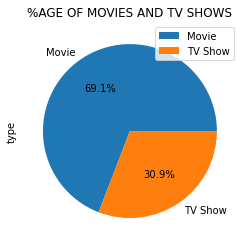

In [24]:
df["type"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.title("%AGE OF MOVIES AND TV SHOWS")
plt.legend()
plt.show()

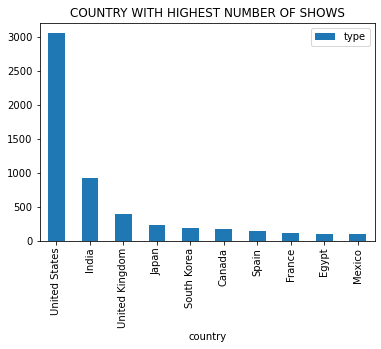

In [25]:
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=False)
countries.head(10).plot(kind="bar")
plt.legend()
plt.title("COUNTRY WITH HIGHEST NUMBER OF SHOWS")
plt.show()

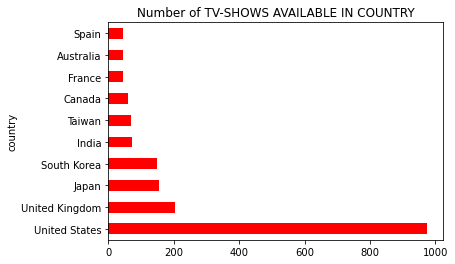

In [26]:
df.groupby(df["types"])["country"].value_counts()[0].head(10).plot(kind="barh",color="red")
plt.title("Number of TV-SHOWS AVAILABLE IN COUNTRY")
plt.show()

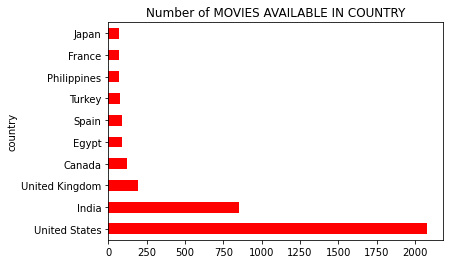

In [27]:
df.groupby(df["types"])["country"].value_counts()[1].head(10).plot(kind="barh",color="red")
plt.title("Number of MOVIES AVAILABLE IN COUNTRY")
plt.show()

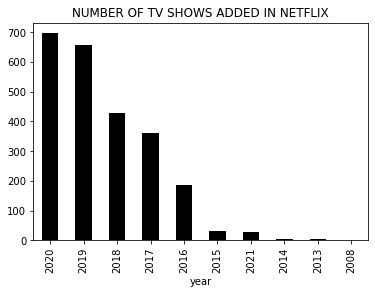

In [28]:
df.groupby(by=df["types"])["year"].value_counts()[0].plot(kind="bar",color="black")
plt.title("NUMBER OF TV SHOWS ADDED IN NETFLIX")
plt.show()

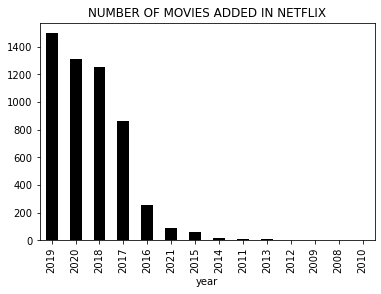

In [29]:
df.groupby(by=df["types"])["year"].value_counts()[1].plot(kind="bar",color="black")
plt.title("NUMBER OF MOVIES ADDED IN NETFLIX")
plt.show()

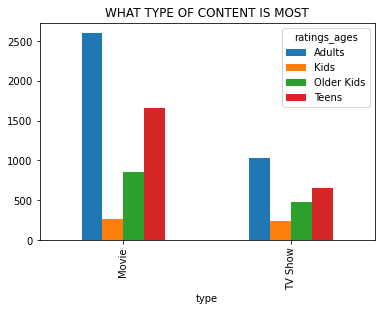

In [30]:
pd.crosstab(df["type"],df["ratings_ages"]).plot(kind="bar")
plt.title("WHAT TYPE OF CONTENT IS MOST")
plt.show()

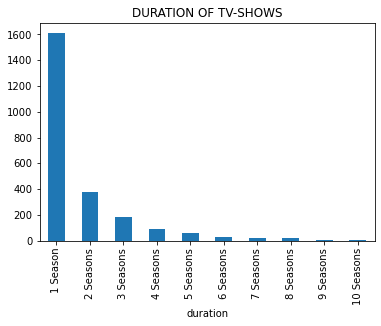

In [31]:
x=df.groupby(df["types"])["duration"].value_counts()[0]
x.head(10).plot(kind="bar")
plt.title("DURATION OF TV-SHOWS")
plt.show()

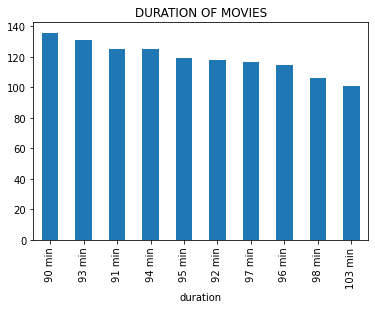

In [32]:
x=df.groupby(df["types"])["duration"].value_counts()[1]
x.head(10).plot(kind="bar")
plt.title("DURATION OF MOVIES")
plt.show()

<AxesSubplot:xlabel='ratings_ages', ylabel='year'>

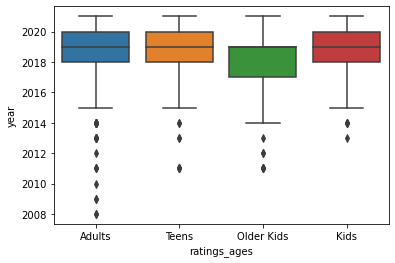

In [33]:
sns.boxplot(x="ratings_ages",y="year",data=df)

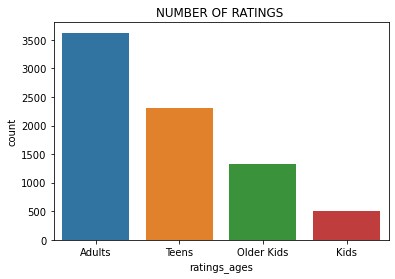

In [34]:
sns.countplot(x="ratings_ages",data=df)
plt.title("NUMBER OF RATINGS ")
plt.show()

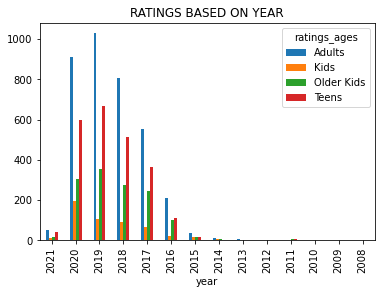

In [35]:
pd.crosstab(df["year"],df["ratings_ages"]).sort_values(by="year",ascending=False).plot(kind="bar")
plt.title("RATINGS BASED ON YEAR")
plt.show()

 ### Listed in Genre

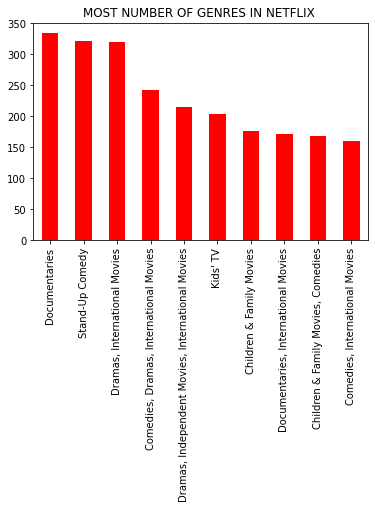

In [38]:
df["listed_in"].value_counts().head(10).plot(kind="bar",color="red")
plt.title("MOST NUMBER OF GENRES IN NETFLIX ")
plt.show()

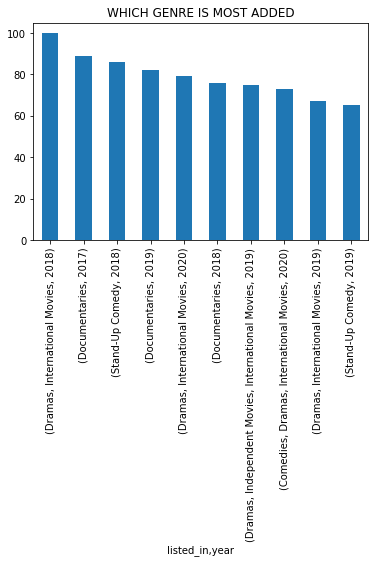

In [39]:
df.groupby(df["listed_in"])["year"].value_counts().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("WHICH GENRE IS MOST ADDED")
plt.show()

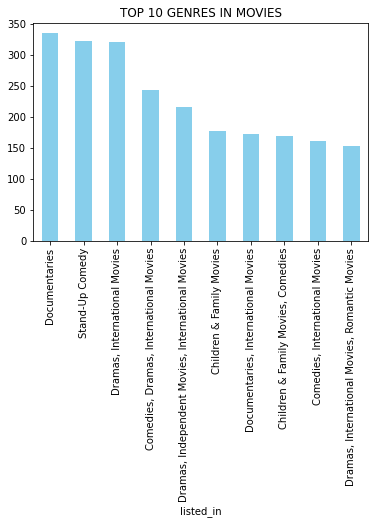

In [42]:
df.groupby(by=df["types"])["listed_in"].value_counts()[1].head(10).plot(kind="bar",color="skyblue")
plt.title("TOP 10 GENRES IN MOVIES")
plt.show()

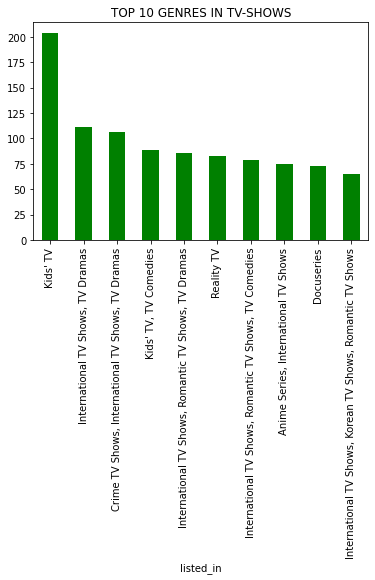

In [45]:
df.groupby(by=df["types"])["listed_in"].value_counts()[0].head(10).plot(kind="bar",color="green")
plt.title("TOP 10 GENRES IN TV-SHOWS")
plt.show()